In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
import seaborn as sns

from matplotlib import pyplot as plt
plt.style.use('seaborn-white')

import warnings
warnings.simplefilter('ignore')

/home/nathan/envs/tfnightly/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/nathan/envs/tfnightly/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/nathan/envs/tfnightly/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/nathan/envs/tfnightly/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/nathan/envs/tfnightly/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/nathan/envs/tf

In [2]:
N = 100
Y = 35

# Shorter version
def model():
    p_true = tfp.edward2.Uniform(name='p_true', low=0., high=1.)
    p_skew = 0.5*p_true + 0.25
    observed_yes = tfp.edward2.Binomial(name='observed_yes', total_count=float(N), probs=p_skew)
    return observed_yes

log_joint = tfp.edward2.make_log_joint_fn(model)
def objective_fn(p_true_in):
    return log_joint(
        p_true=p_true_in,
        observed_yes=Y
    )

states, kernel_results = tfp.mcmc.sample_chain(
    num_results=20000,
    num_burnin_steps=2000,
    current_state=[
        tfp.edward2.Uniform(name='qp_true', low=0., high=1.),
    ],
    kernel=tfp.mcmc.HamiltonianMonteCarlo(
        objective_fn,
        step_size=0.01,
        num_leapfrog_steps=3))

[p_cheating_] = states
accepted = kernel_results.is_accepted

0.21111043 0.09128978
19921


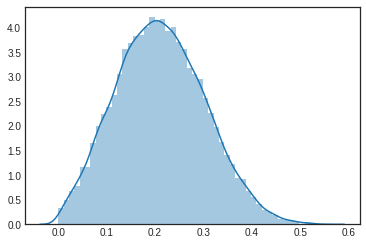

In [3]:
with tf.Session() as sess:
    p_cheat_posterior, accepted_ = sess.run([p_cheating_, accepted])
    
print(p_cheat_posterior.mean(), p_cheat_posterior.std())
print(accepted_.sum())

sns.distplot(p_cheat_posterior)

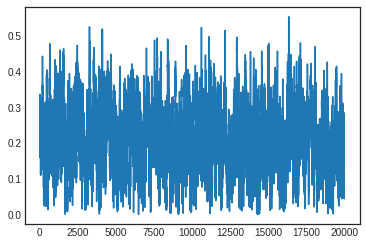

In [4]:
plt.plot(np.arange(len(p_cheat_posterior)), p_cheat_posterior)